In [1]:
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def get_data(model_name, task, title, generation_num):
    data_file_path = f"save_model_{model_name}/{task}/{title}_scratch/model_99/result_only_test_{generation_num}.npy"
    data = np.load(data_file_path)
    return data

In [3]:
# task_title_dict = {
#     "addition": ["3hole_1411_0-100", (50, 50)],
#     "mod_addition": ["3hole_3187_0-113", (56, 56)],
#     "base_addition": ["3hole_1899_0-100", (50, 50)],
#     "linear_regression": ["3hole_2243_0-100", (50, 50)],
# }

In [4]:
# task_title_dict = {
#     "addition": ["1hole_(50, 50)_10_441_0-100", (50, 50)],
#     "mod_addition": ["1hole_(56, 56)_10_441_0-113", (56, 56)],
#     "base_addition": ["1hole_(50, 50)_10_441_0-100", (50, 50)],
#     "linear_regression": ["1hole_(50, 50)_10_441_0-100", (50, 50)],
#     "rabbits_and_chickens": ["1hole_(70, 50)_10_441_0-100", (70, 50)]
# }

In [5]:
task_title_dict = {}
for length in [5, 10, 15, 20]:
    task_title_dict[length] = f"1hole_(50, 50)_{length}_{(2*length+1)**2}_0-100"

In [6]:
model_name = "gpt2-medium"
generation_num = 10


0it [00:00, ?it/s]

121


1it [00:00,  4.32it/s]

441


3it [00:00,  5.06it/s]

961
1681


4it [00:00,  4.88it/s]


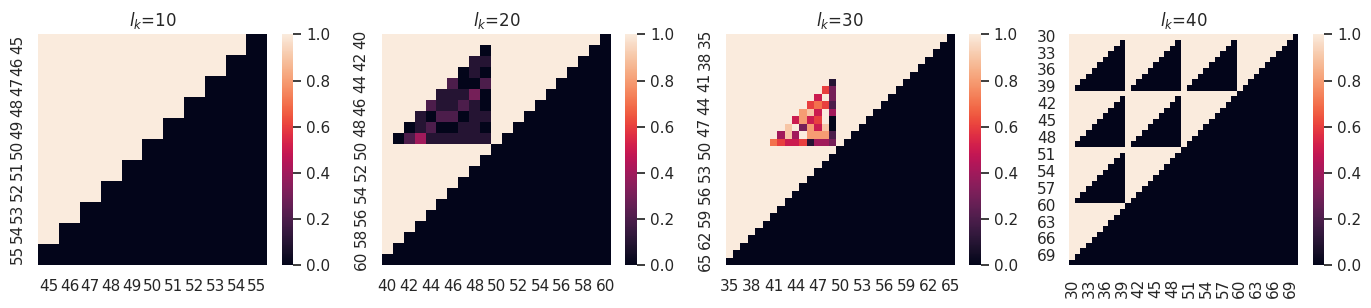

In [7]:
# ax = sns.heatmap(data)
fig, ax = plt.subplots(1,4, figsize=(17, 3))
for idx, length in tqdm(enumerate(task_title_dict.keys())):
    title = task_title_dict[length]
    center = [50, 50]
    rows = np.arange(center[0]-length, center[0]+length+1)
    columns = np.arange(center[1]-length, center[1]+length+1)
    data = get_data(model_name, "addition", title, generation_num)
    print(data.size)
    df = pd.DataFrame(data=data, columns = columns, index=rows)
    # axesSub = sns.heatmap(data=df, ax=ax[idx//3][idx%3], cmap="YlGnBu")
    axesSub = sns.heatmap(data=df, ax=ax[idx])
    axesSub.set_title(f"$l_k$={2*length}")
    # axesSub.set_title(f"$l_k$={2*length}")
# fig.delaxes(ax[1][2])

# ax = sns.heatmap(df, cmap="YlGnBu")
# fig = ax.get_figure()

In [9]:
fig.savefig(f"scratch_red_{model_name}.pdf", bbox_inches = 'tight')

In [17]:
data.size

1681